<a href="https://colab.research.google.com/github/LilBeast999/Tarea_Regresion_Lineal/blob/main/S07-Linear-Models/Tarea_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

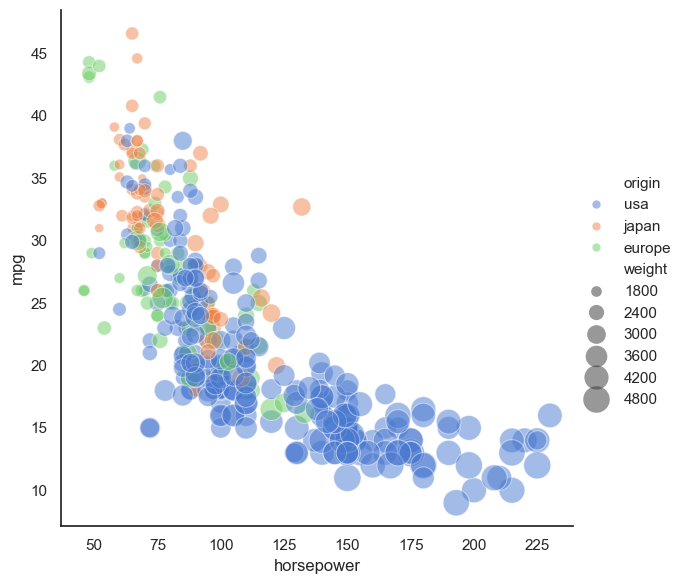

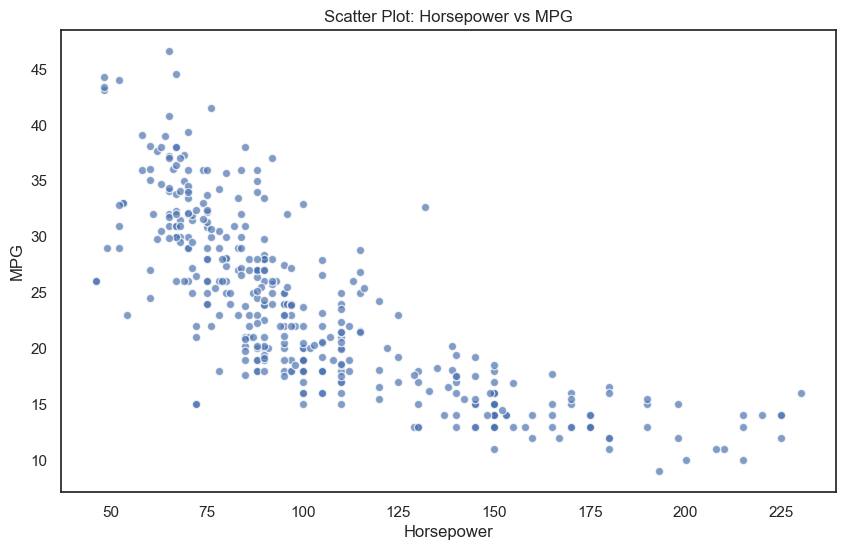

In [10]:
# Install seaborn if not already installed
#%pip install seaborn

import seaborn as sns
sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)
# Creación de la visualización de los datos a través de un gráfico de dispersión
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(mpg['horsepower'], mpg['mpg'], alpha=0.7, edgecolors='w')
plt.title('Scatter Plot: Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()




2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos

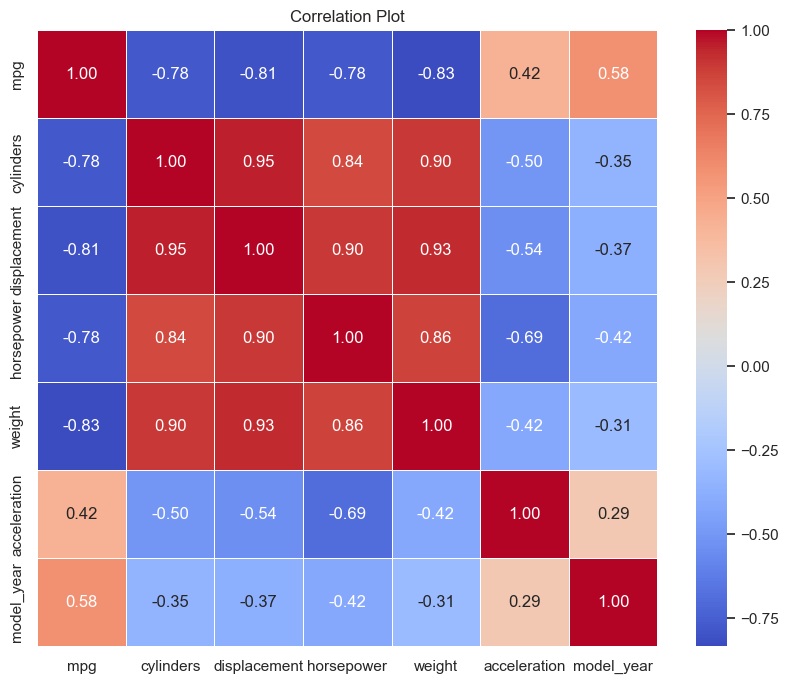

In [ ]:
# Crear un mapa de calor de correlación para las columnas numéricas del DataFrame mpg

# Seleccionar las columnas numéricas y eliminar las filas con valores faltantes
mpg_numeric = mpg.select_dtypes(include=['float64', 'int64']).dropna()

# Calcular la matriz de correlación
corr_matrix = mpg_numeric.corr()

# Graficar el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor de Correlación")
plt.show()

3) (1 punto) Construir y entrenar un modelo de regresion lineal


In [15]:
#%pip install scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Seleccionar la variable predictora y la variable objetivo usando el DataFrame mpg_numeric
X = mpg_numeric[['horsepower']]
y = mpg_numeric['mpg']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construir y entrenar el modelo de regresión lineal
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

print("Intercepto:", reg_model.intercept_)
print("Coeficiente para horsepower:", reg_model.coef_[0])

Intercepto: 40.606097600118346
Coeficiente para horsepower: -0.16259724322918453


4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.


6) (1 punto) [Guardar el Jupyter notebook resultante en su cuenta propia de Github ](https://bebi103a.github.io/lessons/02/git_with_colab.html) y compartir el enlace en la pagina de la tarea en Educandus.